In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import os
%matplotlib inline
sns.set(rc={'axes.facecolor':'#FFFFFF'})
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)

In [47]:
positions = pd.DataFrame.from_csv('/Users/katya/Lab/CRG/Research/HIS3InterspeciesEpistasis/Data_Small_Tables/positions.csv', sep = '\t')

In [48]:
positions

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
wt1,EALGAVRGVK,SNRPYAVVE,LGLQREKVGD,SRITLHVDCL,RGKNDHHRSE,CGIALGQAFK,IHALAKHSGW,HTGIGFLDHM,PEKEAE,IEHSIF,NETKIQ,ALVKRIT
positions,"[140, 141, 142, 143, 144, 145, 146, 147, 148, ...","[170, 171, 172, 173, 174, 175, 176, 177, 178, ...","[179, 180, 181, 182, 183, 184, 185, 186, 187, ...","[205, 206, 207, 208, 209, 210, 211, 212, 213, ...","[215, 216, 217, 218, 219, 220, 221, 222, 223, ...","[130, 131, 132, 133, 134, 135, 136, 137, 138, ...","[100, 101, 102, 103, 104, 105, 106, 107, 108, ...","[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 110, ...","[66, 67, 68, 73, 74, 75, 82, 83, 84, 85, 86, 8...","[41, 42, 43, 44, 64, 65, 76, 77, 78, 79, 80, 81]","[24, 25, 26, 27, 28, 29, 36, 37, 38, 39, 40]","[17, 18, 19, 20, 21, 22, 23, 30, 31, 32, 33, 3..."
len1,10,9,10,10,10,10,10,10,6,6,6,7
len2,10,9,7,10,11,10,10,10,8,6,5,6
start1,140,170,179,205,215,130,100,90,66,41,24,17
end1,149,178,188,214,224,139,109,99,75,65,29,23
wt2,EALSRAVVDL,LSCEMIPHF,LESFAEA,SAFKALAVAI,REATSPNGTND,RFGSGFAPLD,HIDDHHTTED,SLIVECIGDL,TQSQVINV,AVAEQA,GGPLA,IAISLK
start2,160,189,198,225,235,150,120,110,82,76,36,30
end2,169,197,204,234,251,159,129,119,89,81,40,35


In [52]:
data = {}
clean_data = {}

for f in os.listdir('/Users/katya/Lab/CRG/Research/HIS3InterspeciesEpistasis/Data/'):
    if 'csv' in f:
        data[f[:-16]] = pd.DataFrame.from_csv('/Users/katya/Lab/CRG/Research/HIS3InterspeciesEpistasis/Data/' + f, sep = '\t')
        clean_data[f[:-16]] = data[f[:-16]][(data[f[:-16]].nonsense == 0) & (data[f[:-16]].middle == 1)]

In [53]:
columns = list(clean_data['S1'].columns)

## Numbers of wt, internal nodes and other vars

In [54]:
numbers = pd.DataFrame(columns = [chunk for chunk in clean_data], index = ['wt', 'internal_node', 'others'])

for chunk in clean_data:
    numbers[chunk].ix['wt'] = len(clean_data[chunk][clean_data[chunk].dist_min_sp == 0])
    numbers[chunk].ix['internal_node'] = len(clean_data[chunk][(clean_data[chunk].dist_min_sp != 0) & (clean_data[chunk].dist_min_all == 0)])
    numbers[chunk].ix['others'] = len(clean_data[chunk][(clean_data[chunk].dist_min_sp != 0) & (clean_data[chunk].dist_min_all != 0)])

In [55]:
numbers

,S9,S8,S3,S12,S11,S10,S7,S6,S5,S4,S2,S1
wt,1,9,12,7,5,2,11,3,1,13,16,8
internal_node,2,0,2,3,2,2,0,2,1,3,2,2
others,31013,47120,51569,34401,17253,31228,4691,47688,53727,45882,48194,59864


## Lengths distribution

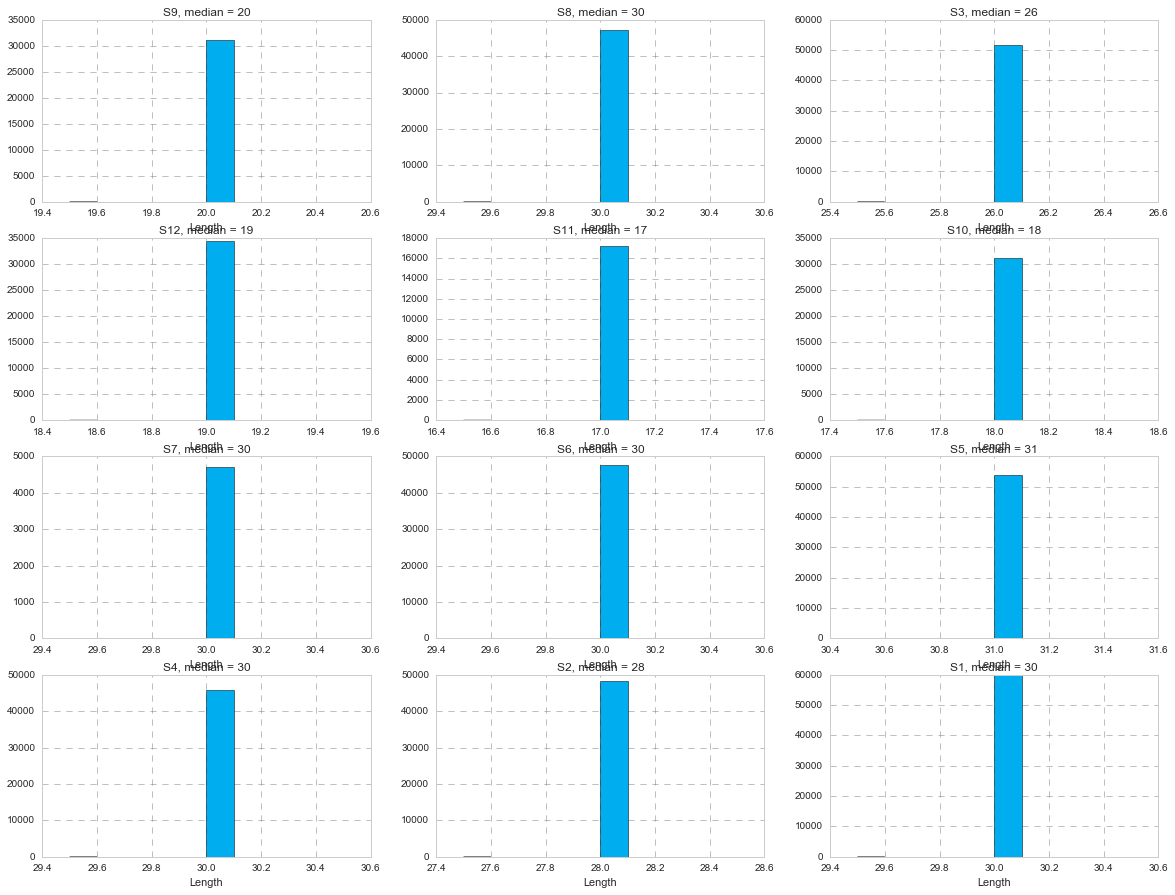

In [57]:
plt.figure(figsize=(4*5,3*5))
count=1
for chunk in clean_data.keys():
    plt.subplot(4,3,count)
    plt.title(chunk + ', median = %d' %np.median(clean_data[chunk]['len']))
    plt.hist(clean_data[chunk]['len'], color='#00AEEF', linewidth=0.5)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Length')
    count+=1

## Fitness of all

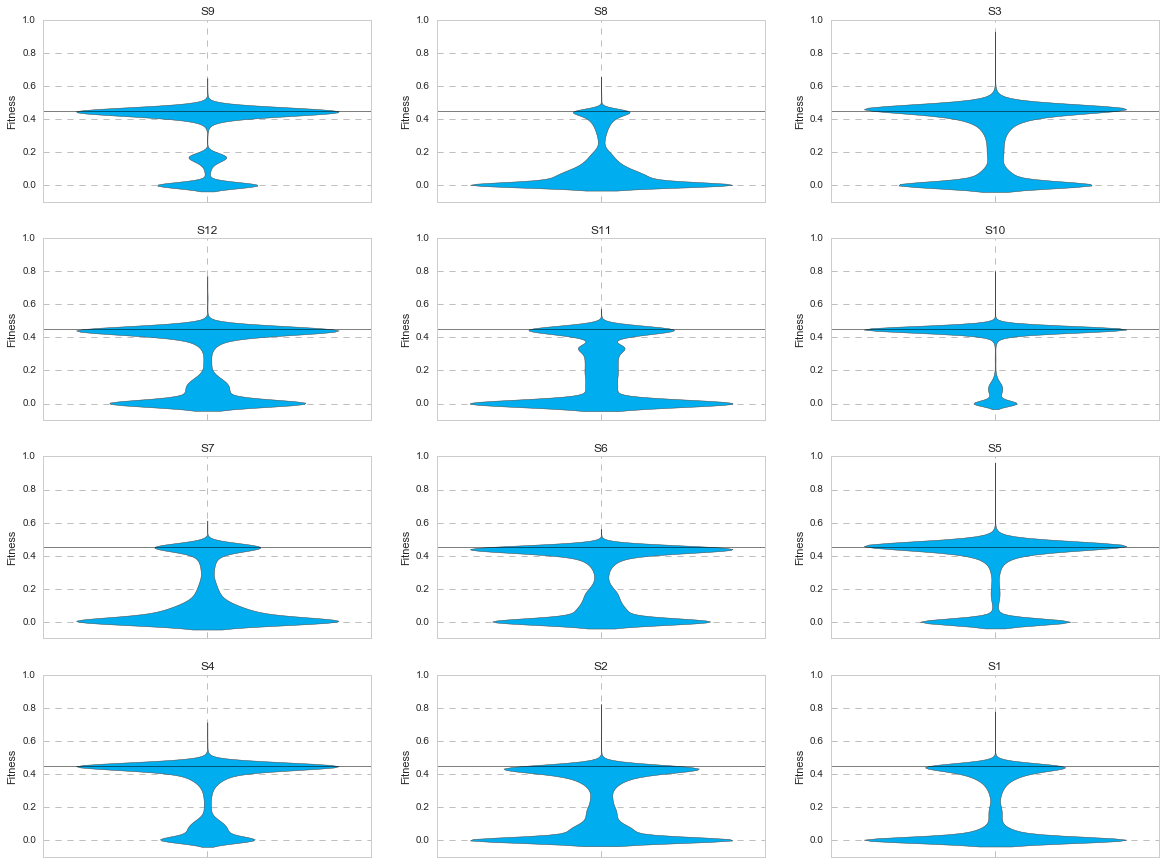

In [58]:
plt.figure(figsize=(4*5,3*5))
count=1
for chunk in data.keys():
    plt.subplot(4,3,count)
    plt.title(chunk)
    sns.violinplot(data[chunk].s, color='#00AEEF', orient='v', linewidth=0.5, saturation=1, inner=None)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.plot(np.linspace(-20,120,1000), [0.45]*1000, 'k', linewidth=1, alpha=0.5)
    plt.ylabel('Fitness')
    plt.ylim(-0.1, 1.0)
    count+=1

## Fitness, no nonsense

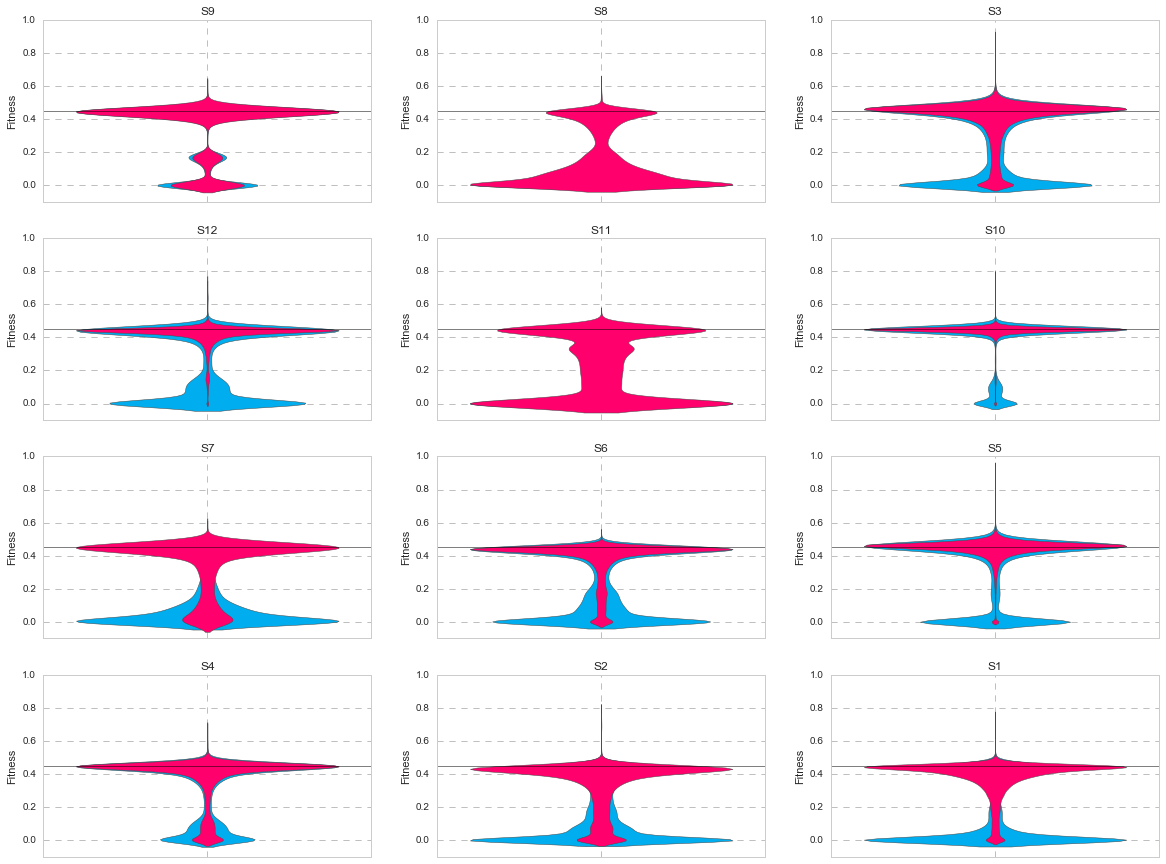

In [60]:
plt.figure(figsize=(4*5,3*5))
count=1
for chunk in data.keys():
    plt.subplot(4,3,count)
    plt.title(chunk)
    sns.violinplot(data[chunk].s, color='#00AEEF', orient='v', linewidth=0.5, saturation=1, inner=None)
    sns.violinplot(clean_data[chunk].s, color='#FF006C', orient='v', linewidth=0.5, saturation=1, inner=None)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.plot(np.linspace(-20,120,1000), [0.45]*1000, 'k', linewidth=1, alpha=0.5)
    plt.ylabel('Fitness')
    plt.ylim(-0.1, 1.0)
    count+=1

## Hamming distances to Cerevisia

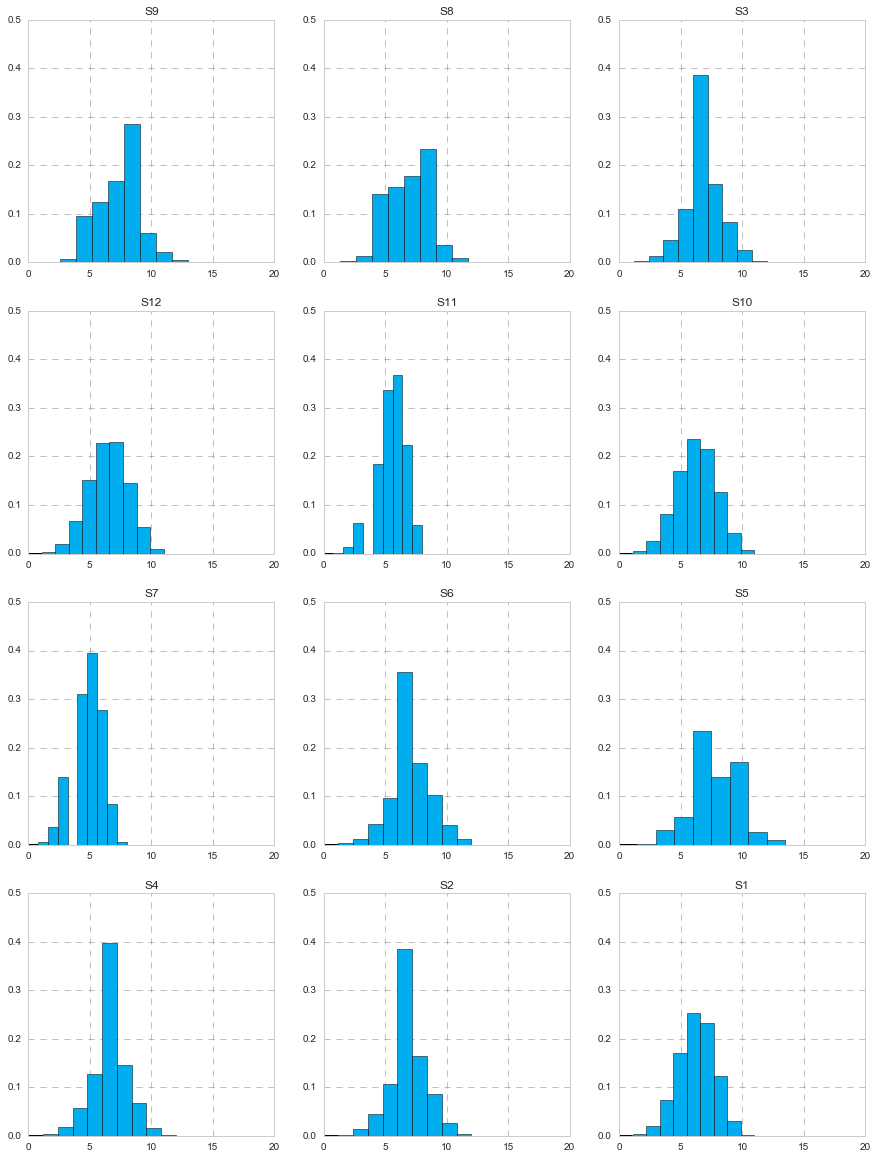

In [62]:
plt.figure(figsize=(3*5,4*5))
count=1
for chunk in data.keys():
    plt.subplot(4,3,count)
    plt.title(chunk)
    plt.hist(clean_data[chunk].dist_Scer, color='#00AEEF', linewidth=0.5, normed=True)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.ylim(0, 0.5)
    plt.xlim(0, 20)
    count+=1

## Hamming distances to any wt

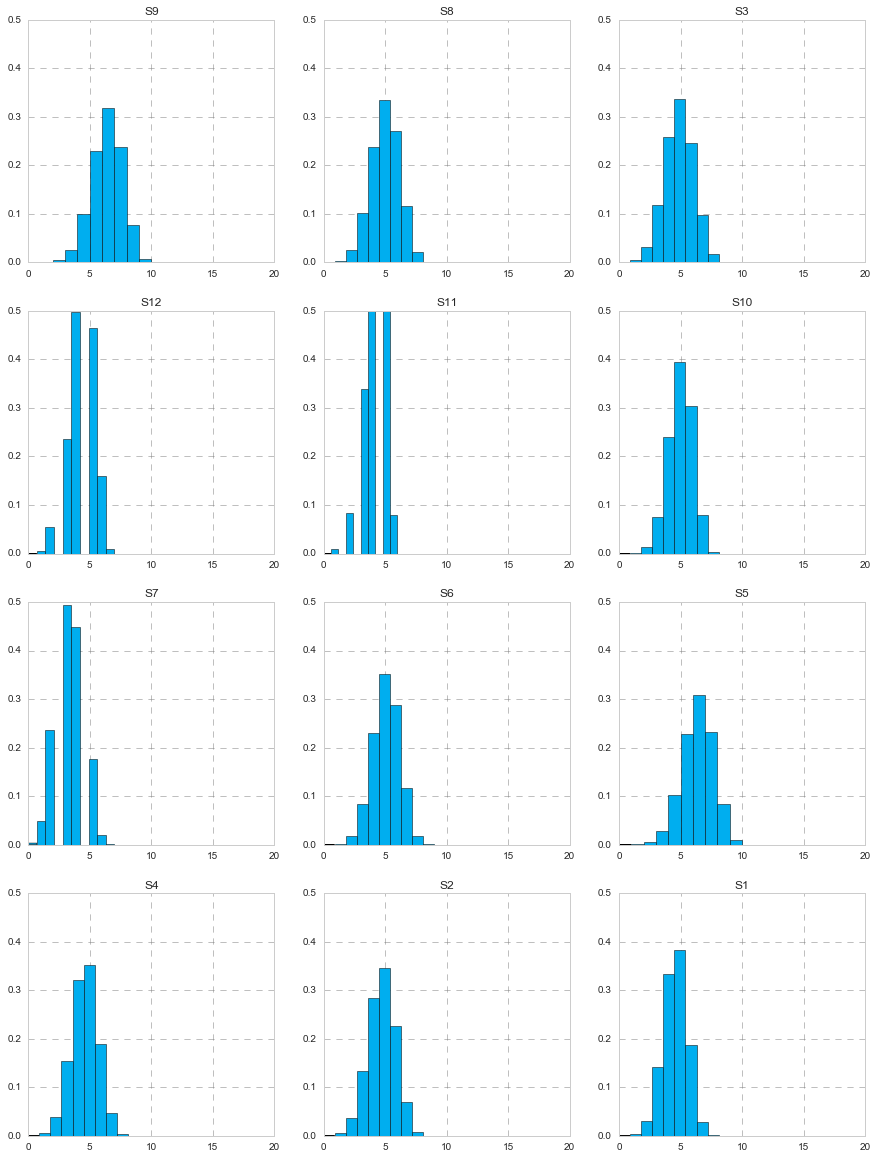

In [64]:
plt.figure(figsize=(3*5,4*5))
count=1
for chunk in data.keys():
    plt.subplot(4,3,count)
    plt.title(chunk)
    plt.hist(clean_data[chunk].dist_min_sp, color='#00AEEF', linewidth=0.5, normed=True)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.ylim(0, 0.5)
    plt.xlim(0, 20)
    count+=1

## (Dis)similarities

In [66]:
similarity = {}
for chunk in clean_data:
    names = [name for name in clean_data[chunk].columns if 'dist' in name and 'node' not in name and 'min' not in name]
    similarity[chunk] = pd.DataFrame(index = names, columns = names)
    for name1 in names:
        for name2 in names:
            similarity[chunk][name1].ix[name2] = len(clean_data[chunk][clean_data[chunk][name1] != clean_data[chunk][name2]])
    similarity[chunk]  = similarity[chunk].fillna(0)
    similarity[chunk].columns = [name[5:] for name in names]
    similarity[chunk].index = [name[5:] for name in names]

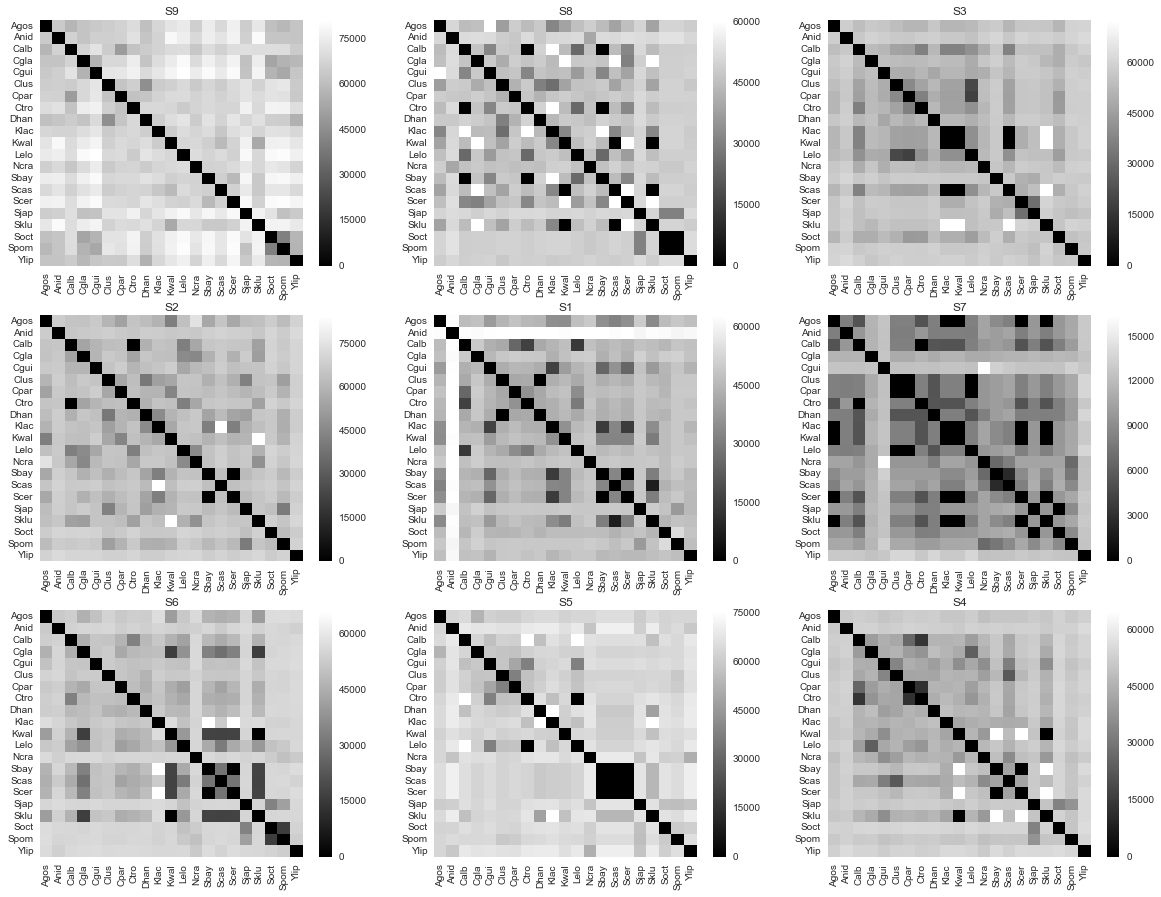

In [188]:
plt.figure(figsize=(4*5,3*5))
count=1
for chunk in data.keys():
    plt.subplot(3,3,count)
    plt.title(chunk)
    sns.heatmap(similarity[chunk], cmap='gray')
    count+=1

## Distance to Cerevisia vs fitness -- wt and internal node vars

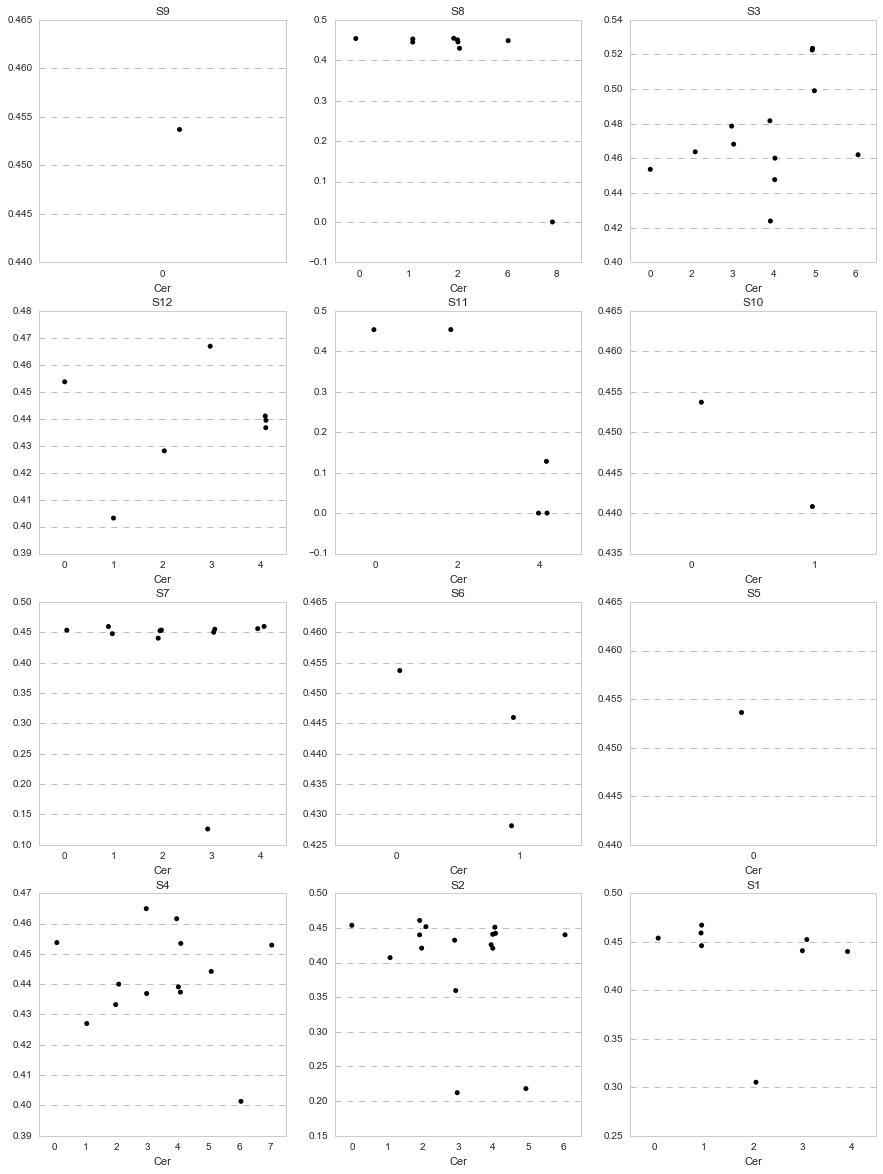

In [65]:
plt.figure(figsize=(3*5,4*5))
count=1
for chunk in clean_data.keys():
    test = pd.DataFrame(clean_data[chunk].s[(clean_data[chunk].dist_min_sp == 0)&(clean_data[chunk].dist_min_all == 0)])
    test['Cer'] = clean_data[chunk].dist_Scer[(clean_data[chunk].dist_min_sp == 0)&(clean_data[chunk].dist_min_all == 0)]
    test.reset_index(inplace=True)
    test.columns = ['aa_seq','Fitness','Cer']

    test = pd.pivot_table(test, index = ['aa_seq'], columns = ['Cer'])
    test.columns = test.columns.droplevel()

    if len(test)>0:
        plt.subplot(4,3,count)
        plt.title(chunk)
        plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
        sns.stripplot(data=test, size=5, jitter=True, color='k')
        count+=1

## Distance to Cerevisia vs fitness -- non-wt vars

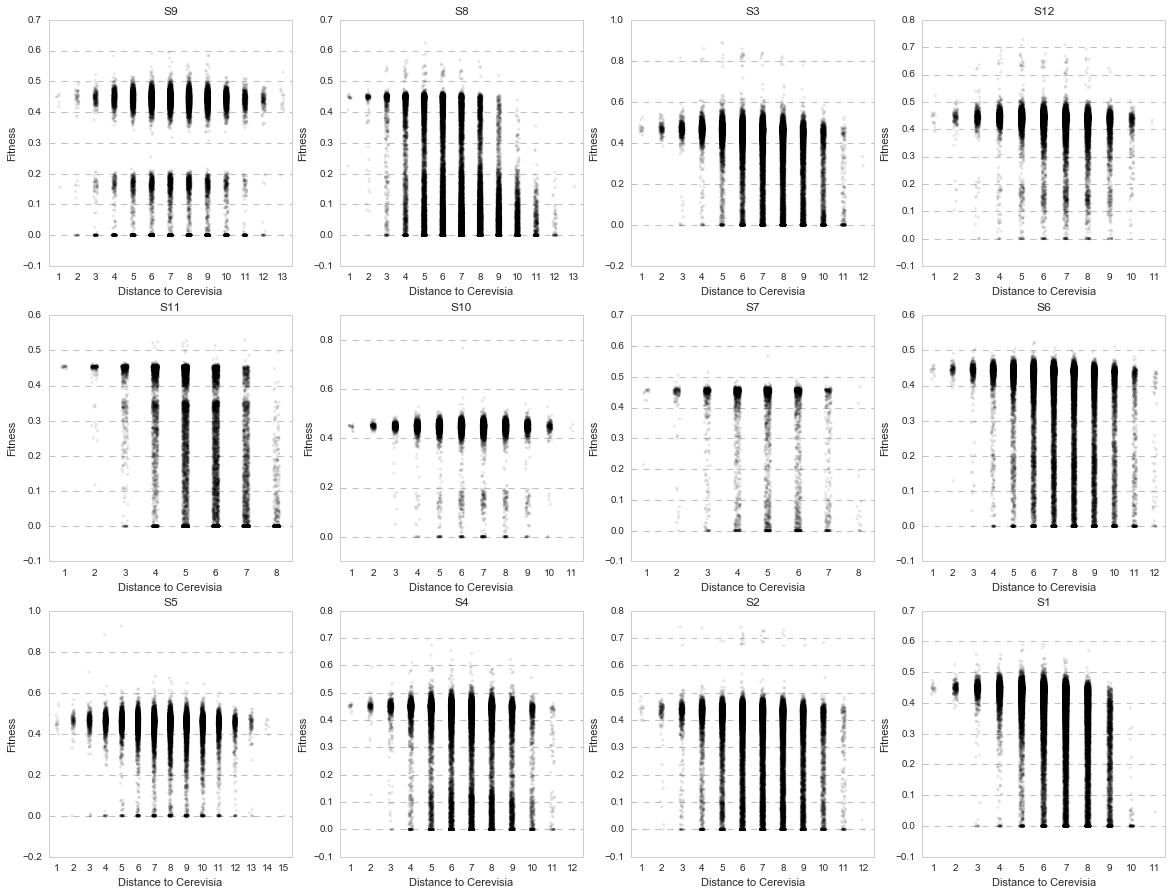

In [69]:
plt.figure(figsize=(4*5,3*5))
count=1
for chunk in clean_data.keys():
    test = pd.DataFrame(clean_data[chunk].s[(clean_data[chunk].dist_min_sp != 0)&(clean_data[chunk].dist_min_all != 0)])
    test['Cer'] = clean_data[chunk].dist_Scer[(clean_data[chunk].dist_min_sp != 0)&(clean_data[chunk].dist_min_all != 0)]
    test.reset_index(inplace=True)
    test.columns = ['aa_seq','Fitness','Cer']

    test = pd.pivot_table(test, index = ['aa_seq'], columns = ['Cer'])
    test.columns = test.columns.droplevel()

    if len(test)>0:
        plt.subplot(3,4,count)
        plt.title(chunk)
        plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
        sns.stripplot(data=test, size=3, jitter=True, alpha=0.1, color='k')
        plt.xlabel('Distance to Cerevisia')
        plt.ylabel('Fitness')
        count+=1

## Distance to Cerevisia vs fitness -- non-wt vars

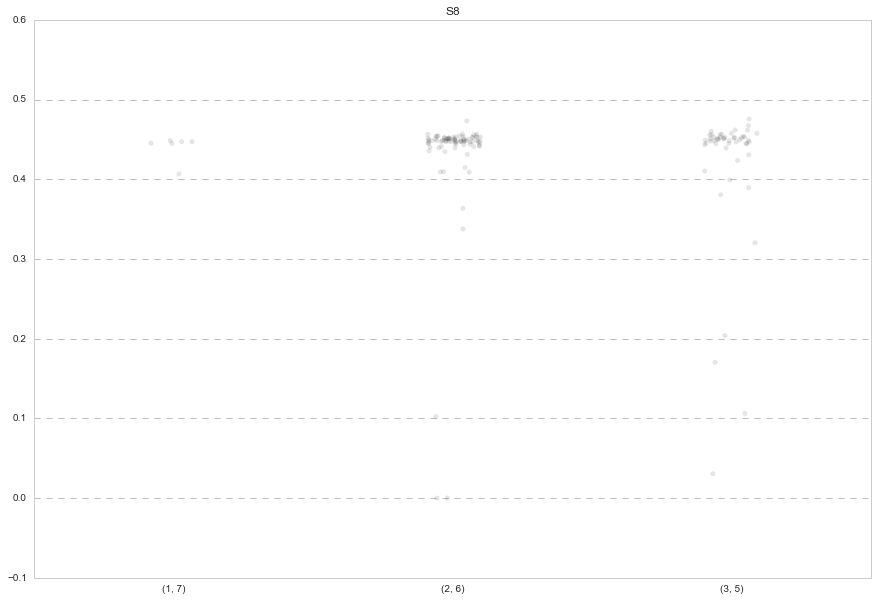

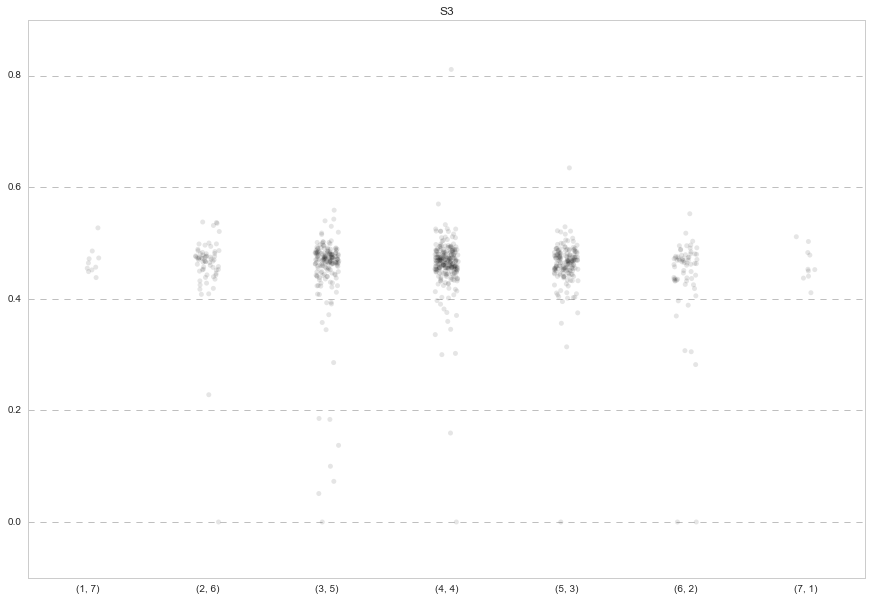

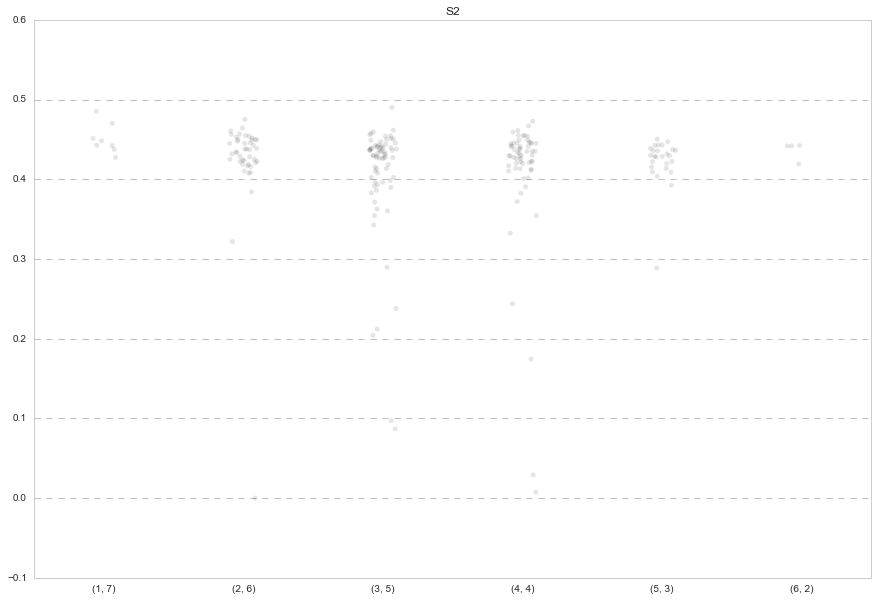

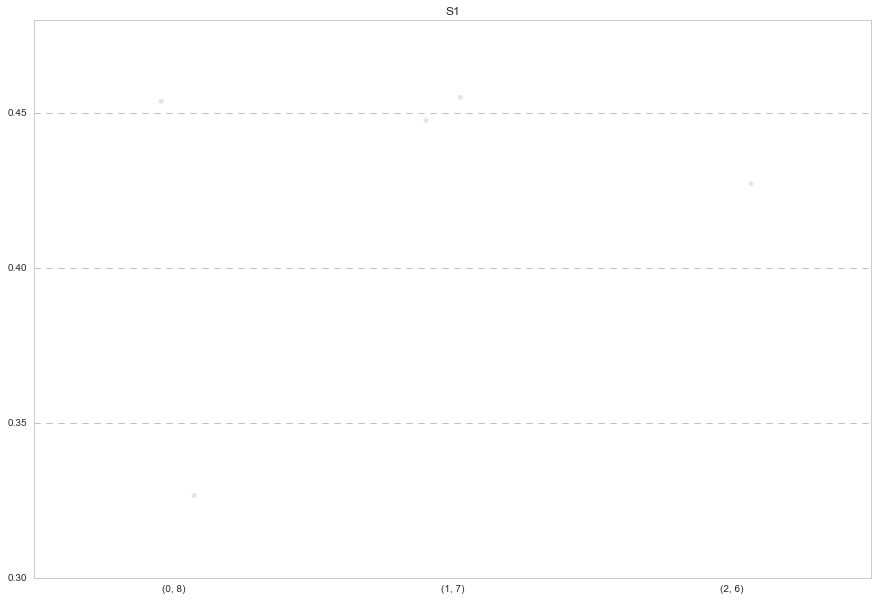

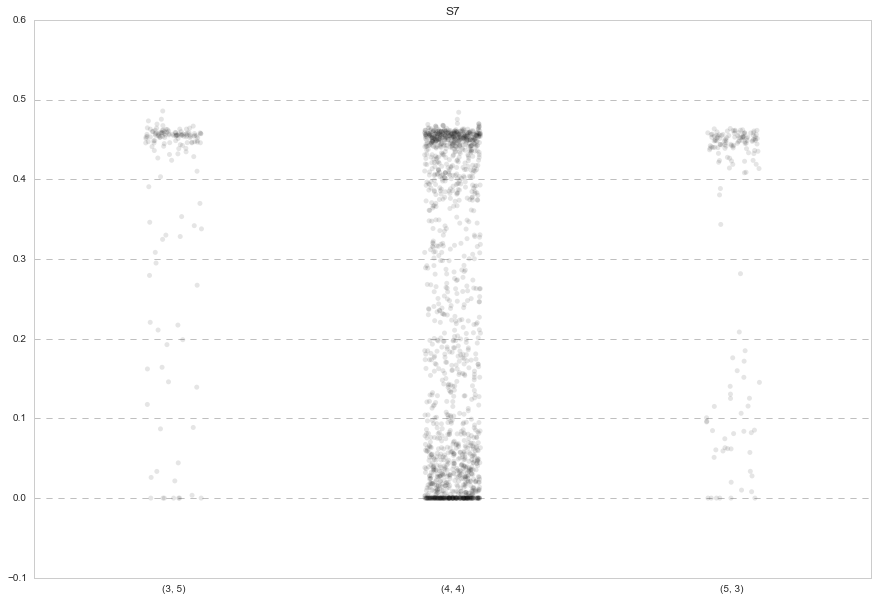

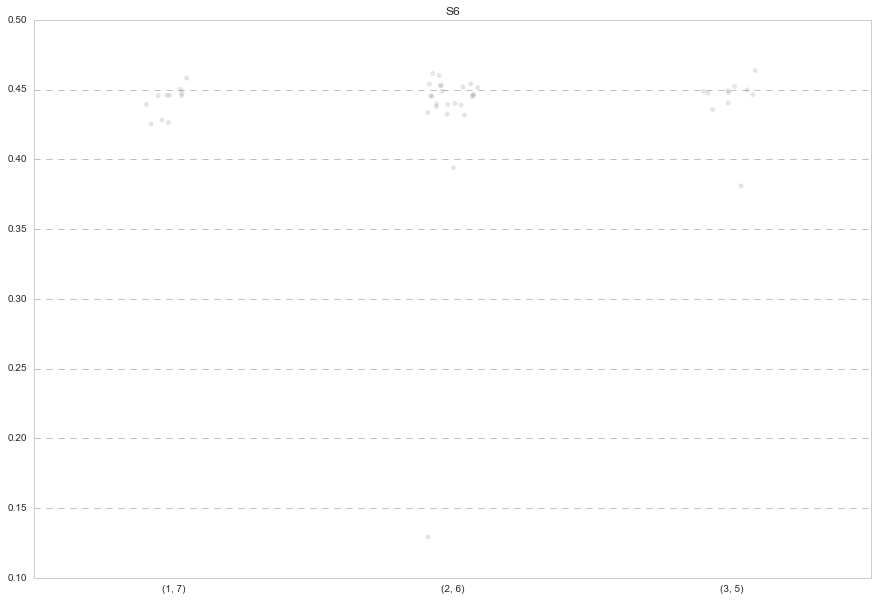

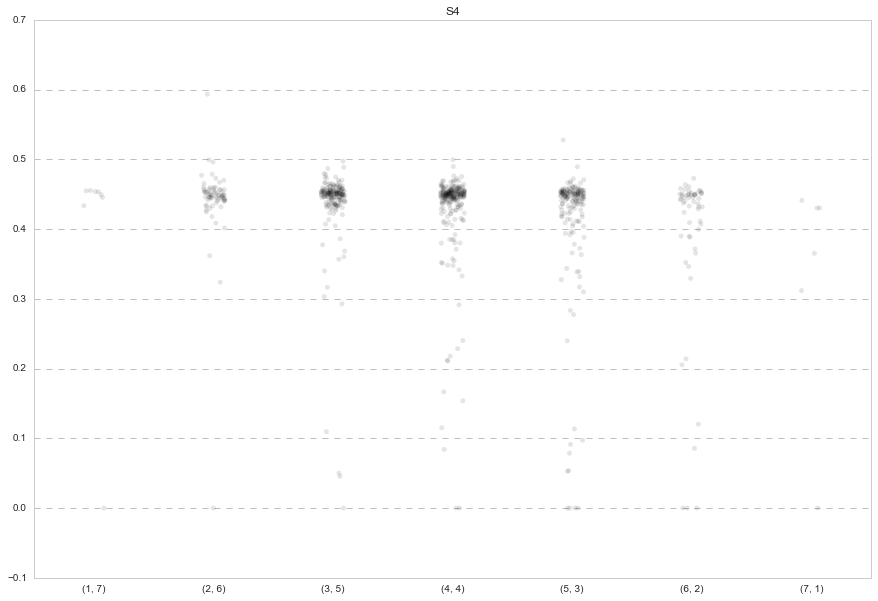

In [35]:
for chunk in clean_data.keys():
    test = pd.DataFrame(clean_data[chunk].s)
    test['Cer'] = clean_data[chunk].dist_Scer
    test['Anid'] = clean_data[chunk].dist_Anid
    test.reset_index(inplace=True)
    test.columns = ['aa_seq','Fitness','Cer', 'Anid']

    test = pd.pivot_table(test[test.Cer + test.Anid == 8], index = ['aa_seq'], columns = ['Cer', 'Anid'])
    test.columns = test.columns.droplevel()

    if len(test)>0:
        plt.figure(figsize=[15,10])
        plt.title(chunk)
        plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
        sns.stripplot(data=test, size=5, jitter=True, alpha=0.1, color='k')